In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier,GradientBoostingRegressor
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

In [3]:
data = pd.read_csv("/content/drive/MyDrive/Churn_Modelling.csv")
print(data.tail())
display(data.info())


      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
9995       9996    15606229   Obijiaku          771    France    Male   39   
9996       9997    15569892  Johnstone          516    France    Male   35   
9997       9998    15584532        Liu          709    France  Female   36   
9998       9999    15682355  Sabbatini          772   Germany    Male   42   
9999      10000    15628319     Walker          792    France  Female   28   

      Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
9995       5       0.00              2          1               0   
9996      10   57369.61              1          1               1   
9997       7       0.00              1          0               1   
9998       3   75075.31              2          1               0   
9999       4  130142.79              1          1               0   

      EstimatedSalary  Exited  
9995         96270.64       0  
9996        101699.77       0  
9997         42085.5

None

Using 'get_dummies' to perform one-hot encoding on data after dropping stray invalid data.

In [4]:
data = data.dropna()

data = pd.get_dummies(data)



Splitting data into features[x] and result/target[y]

In [5]:
x = data.drop('Exited', axis=1)
y = data['Exited']

Using 'train_test_split' to split our features and target into train & test portions due to not having seperate datasets for training and testing

In [6]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.3, random_state=50)


Training a Random Forest Classification Model

In [7]:
forest_classifier = RandomForestClassifier(n_estimators = 200, random_state=50)
forest_classifier.fit(x_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=50)

In [8]:
y_pred = forest_classifier.predict(x_test)

print("accuracy: ", accuracy_score(y_test, y_pred))
print("Classification Report", classification_report(y_test, y_pred))


accuracy:  0.8563333333333333
Classification Report               precision    recall  f1-score   support

           0       0.86      0.99      0.92      2401
           1       0.86      0.34      0.48       599

    accuracy                           0.86      3000
   macro avg       0.86      0.66      0.70      3000
weighted avg       0.86      0.86      0.83      3000



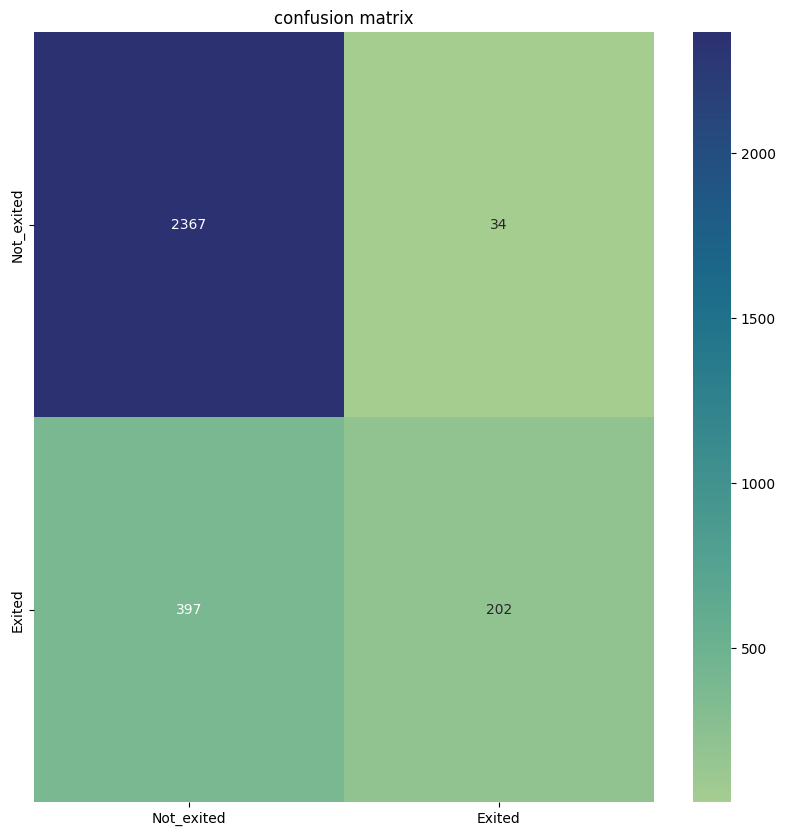

In [11]:
cnf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10,10))
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix')
sns.heatmap(cnf_matrix, fmt='g',cmap='crest',annot = True, xticklabels=['Not_exited', 'Exited'], yticklabels=['Not_exited','Exited'])
plt.show()

Using logistic Regression Model gives results as well,  but not as satisfactory as random forest classifier.

In [12]:
scaler = StandardScaler()
scaler.fit(x_train)
x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

lg_md = LogisticRegression()
lg_md.fit(x_train, y_train)

y_pred_lg = lg_md.predict(x_test)
print('accuracy: ', accuracy_score(y_test, y_pred_lg))
lg_md.score(x_test, y_test)

accuracy:  0.765


0.765

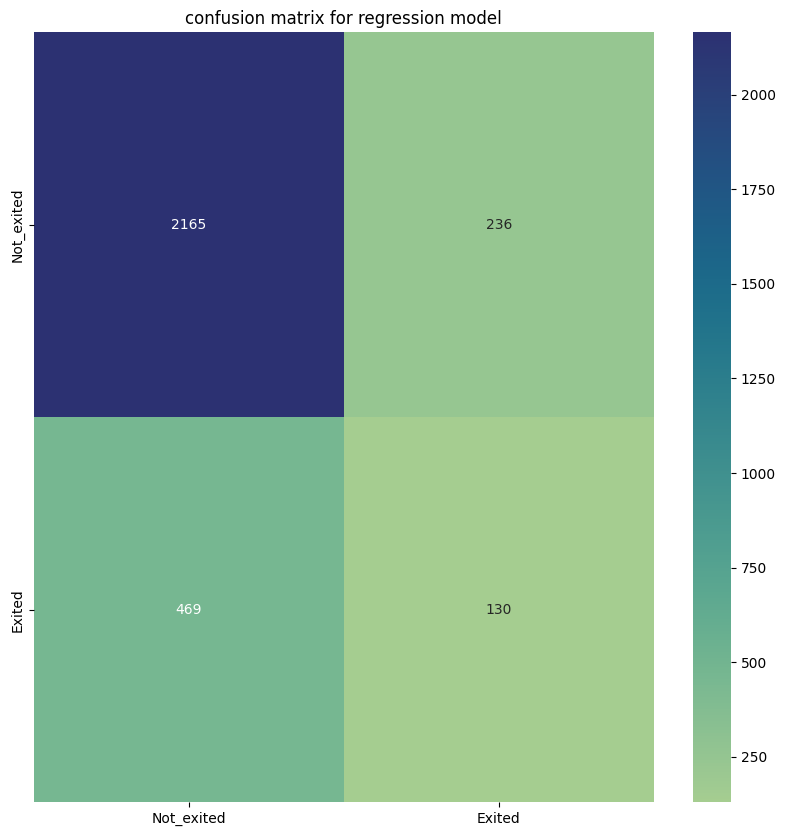

In [13]:
cnf_matrix_lg = confusion_matrix(y_test, y_pred_lg)
plt.figure(figsize=(10,10))
plt.xlabel('predicted')
plt.ylabel('actual')
plt.title('confusion matrix for regression model')
sns.heatmap(cnf_matrix_lg, fmt='g',cmap='crest',annot = True, xticklabels=['Not_exited', 'Exited'], yticklabels=['Not_exited','Exited'])
plt.show()